## Importing modules


In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np

import config, os

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

from scipy.stats import randint, uniform

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

## Collecting data

In [3]:
processed_data_path = os.path.join(config.DATA_DIR, 'preprocessed_data', '유동인구_학습용_데이터.csv')

train_data = gpd.read_file(processed_data_path, encoding='cp949')

In [4]:
train_data

,geometry,rep_point,TRDAR_CD,ALLEY_TRDA,ADSTRD_CD,총_유동인구_수_밀도_평균,총_상주인구_수_밀도_평균,총_가구_수_밀도_평균,월_평균_소득_금액_밀도_평균,지출_총금액_밀도_평균,...,건강기능식품일반판매업_수_300m,건강기능식품일반판매업_수_600m,미용업_수_300m,미용업_수_600m,일반음식점_수_300m,일반음식점_수_600m,커피숍_수_300m,커피숍_수_600m,편의점_수_300m,편의점_수_600m
0,"POLYGON ((193830.5314 450892.687200001, 193885...",POINT (193830.76205513312 450794.5491500005),['3110566'],"['3110566', '3110569']",11440660,9.668006339452155,0.014702362475723867,0.009410052686338622,8.86034419994084,14905.273773954415,...,9,37,87,244,237,815,36,102,4,15
1,"POLYGON ((193964.7136 450827.455800001, 193965...",POINT (193972.3388341549 450702.5575),['3110569'],"['3110566', '3110569']",11440660,10.041025288829035,0.018598339870326146,0.012540826168489736,12.562895566434335,15188.331737439477,...,10,27,54,186,235,618,26,84,4,12
2,POLYGON ((193875.71294513208 450674.2674903865...,POINT (193739.43414649827 450572.61569999997),['3110566'],"['3110566', '3110569', '3110565']",11440660,9.224679726208002,0.014393886514228143,0.009182714735684975,9.32673444978672,14905.273773954415,...,8,43,97,275,319,893,50,114,4,17
3,"POLYGON ((193871.9744 450668.0229, 193875.7129...",POINT (193883.59807197447 450623.05305000045),['3110569'],"['3110566', '3110569', '3110565']",11440660,9.597698675584882,0.01828986390883042,0.012313488217836089,13.029285816280215,15188.331737439477,...,9,35,66,206,297,669,35,91,4,12
4,"POLYGON ((193831.9161 450577.561000001, 193834...",POINT (193802.04919581296 450509.4183999995),['3110569'],"['3110566', '3110569', '3110565']",11440655,7.543496711152872,0.01905367677299549,0.012025493042960377,13.36990541708589,4263.386938448296,...,6,37,63,243,302,803,43,110,3,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,POLYGON ((192092.5605569511 449688.95344474976...,POINT (192164.39880748477 449736.25400000054),[],"['3110550', '3110556']",11440680,3.707351146844316,0.013465553720894039,0.007486999821359687,4.228867719654157,2941.0385895753748,...,4,34,38,167,147,594,12,44,2,15
805,POLYGON ((192677.03544143992 449355.9468408768...,POINT (192651.7266645899 449324.44810000097),[],['3110556'],11440655,3.1971426859409897,0.012657528483128209,0.006546824499848358,5.647563918009871,1902.1528901094073,...,0,9,5,86,12,300,2,22,0,7
806,"POLYGON ((191576.85959080743 450088.880411295,...",POINT (191561.5398572982 450048.35310917883),['3110546'],['3110546'],11440680,4.699173202130144,0.017581876599357563,0.009668040101687552,11.439206944493092,6637.219872686618,...,2,11,8,72,41,398,8,38,3,13
807,POLYGON ((191570.80319246632 450236.3938343699...,POINT (191552.67525982286 450158.88620000053),['3110546'],"['3110544', '3110546']",11440680,5.729840187736735,0.02006196523616527,0.010966832363821061,10.858165359527954,6637.219872686618,...,2,13,21,91,112,455,13,50,5,14


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   geometry            809 non-null    object
 1   rep_point           809 non-null    object
 2   TRDAR_CD            809 non-null    object
 3   ALLEY_TRDA          809 non-null    object
 4   ADSTRD_CD           809 non-null    object
 5   총_유동인구_수_밀도_평균      809 non-null    object
 6   총_상주인구_수_밀도_평균      809 non-null    object
 7   총_가구_수_밀도_평균        809 non-null    object
 8   월_평균_소득_금액_밀도_평균    809 non-null    object
 9   지출_총금액_밀도_평균        809 non-null    object
 10  아파트_단지_수_밀도_평균      809 non-null    object
 11  아파트_평균_면적_밀도_평균     809 non-null    object
 12  아파트_평균_시가_밀도_평균     809 non-null    object
 13  총_직장_인구_수_밀도_평균     809 non-null    object
 14  집객시설_수_밀도_평균        809 non-null    object
 15  지하철_수_800m          809 non-null    object
 16  지하철_수_1200m         809 no

In [6]:
float_col = train_data.filter(like='평균', axis=1).columns
int_col = train_data.filter(regex=r'^(?!.*평균).*수.*', axis=1).columns

train_data[float_col] = train_data[float_col].astype(float)
train_data[int_col] = train_data[int_col].astype(int)

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   geometry            809 non-null    object 
 1   rep_point           809 non-null    object 
 2   TRDAR_CD            809 non-null    object 
 3   ALLEY_TRDA          809 non-null    object 
 4   ADSTRD_CD           809 non-null    object 
 5   총_유동인구_수_밀도_평균      809 non-null    float64
 6   총_상주인구_수_밀도_평균      809 non-null    float64
 7   총_가구_수_밀도_평균        809 non-null    float64
 8   월_평균_소득_금액_밀도_평균    809 non-null    float64
 9   지출_총금액_밀도_평균        809 non-null    float64
 10  아파트_단지_수_밀도_평균      809 non-null    float64
 11  아파트_평균_면적_밀도_평균     809 non-null    float64
 12  아파트_평균_시가_밀도_평균     809 non-null    float64
 13  총_직장_인구_수_밀도_평균     809 non-null    float64
 14  집객시설_수_밀도_평균        809 non-null    float64
 15  지하철_수_800m          809 non-null    int64  
 16  지하철_수_12

## Spliting data

In [8]:
# 훈련-테스트: 80%-20%
Y = train_data[['총_유동인구_수_밀도_평균', 'ADSTRD_CD']]
X = train_data.drop(['geometry', 'rep_point', 'TRDAR_CD', 'ALLEY_TRDA', 'ADSTRD_CD', '총_유동인구_수_밀도_평균'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y.ADSTRD_CD)
y_train, y_test = y_train[['총_유동인구_수_밀도_평균']], y_test[['총_유동인구_수_밀도_평균']]
print(f"X 크기: 훈련-{len(x_train)}, 테스트-{len(x_test)}")
print(f"Y 크기: 훈련-{len(y_train)}, 테스트-{len(y_test)}")

X 크기: 훈련-647, 테스트-162
Y 크기: 훈련-647, 테스트-162


## Scaling data

In [9]:
# Scaling with StandardScaler
scaler = StandardScaler()

x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [10]:
# log scaling
y_train_log = np.log1p(y_train)
y_test_log  = np.log1p(y_test)

## Using XGBRegressor

In [11]:
xgb_rgr = XGBRegressor(
  objective="reg:squarederror",
  random_state=42,
  n_jobs=-1
)

params_dict = {
  "n_estimators": randint(300, 900),
  "max_depth": randint(5, 8),
  "learning_rate": uniform(0.01, 0.03),
  "subsample": uniform(0.8, 0.2),
  "colsample_bytree": uniform(0.6, 0.2),
  "min_child_weight": randint(2, 6),
}

rscv_xgb = RandomizedSearchCV(
  estimator=xgb_rgr,
  param_distributions=params_dict,
  n_iter=50,
  cv=5,
  scoring="neg_root_mean_squared_error",
  random_state=42,
  verbose=1,
  n_jobs=-1
)

rscv_xgb.fit(x_train_scaled, y_train_log)

print("best score:", -rscv_xgb.best_score_)
print("best params:", rscv_xgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
best score: 0.0797537051141262
best params: {'colsample_bytree': np.float64(0.6621964643431324), 'learning_rate': np.float64(0.019755499660802412), 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 846, 'subsample': np.float64(0.89444298503239)}


## Using LightGBMRegressor

In [12]:
lgb_rgr = LGBMRegressor(
  objective="regression",
  random_state=42,
  n_jobs=1
)

params_dict = {
  "n_estimators": randint(300, 900),
  "max_depth": randint(5, 8),
  "num_leaves": randint(20, 2**8),
  "learning_rate": uniform(0.01, 0.03),
  "subsample": uniform(0.8, 0.2),
  "colsample_bytree": uniform(0.6, 0.2),
  "min_child_samples": randint(20, 50),
}

rscv_lgb = RandomizedSearchCV(
  estimator=lgb_rgr,
  param_distributions=params_dict,
  n_iter=50,
  cv=5,
  scoring="neg_root_mean_squared_error",
  random_state=42,
  verbose=1,
  n_jobs=-1
)

rscv_lgb.fit(x_train_scaled, y_train_log)

print("Best RMSE:", -rscv_lgb.best_score_)
print("Best params:", rscv_lgb.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3177
[LightGBM] [Info] Number of data points in the train set: 647, number of used features: 29
[LightGBM] [Info] Start training from score 2.229548
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -in

C:\Users\pegoo\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Predicting test data

In [13]:
x_tr, x_v, y_tr, y_v = train_test_split(x_train_scaled, y_train_log, test_size=0.2, random_state=42)

In [20]:
final_xgb = XGBRegressor(
  **rscv_xgb.best_params_,
  objective="reg:squarederror",
  random_state=42,
  n_jobs=-1
)

final_xgb.fit(
  x_tr, y_tr,
  eval_set=[(x_v, y_v)],
)

[0]	validation_0-rmse:0.32485
[1]	validation_0-rmse:0.32072
[2]	validation_0-rmse:0.31714
[3]	validation_0-rmse:0.31361
[4]	validation_0-rmse:0.31029
[5]	validation_0-rmse:0.30615
[6]	validation_0-rmse:0.30260
[7]	validation_0-rmse:0.29918
[8]	validation_0-rmse:0.29496
[9]	validation_0-rmse:0.29109
[10]	validation_0-rmse:0.28769
[11]	validation_0-rmse:0.28438
[12]	validation_0-rmse:0.28076
[13]	validation_0-rmse:0.27706
[14]	validation_0-rmse:0.27418
[15]	validation_0-rmse:0.27095
[16]	validation_0-rmse:0.26765
[17]	validation_0-rmse:0.26440
[18]	validation_0-rmse:0.26113
[19]	validation_0-rmse:0.25807
[20]	validation_0-rmse:0.25496
[21]	validation_0-rmse:0.25213
[22]	validation_0-rmse:0.24935
[23]	validation_0-rmse:0.24659
[24]	validation_0-rmse:0.24365
[25]	validation_0-rmse:0.24162
[26]	validation_0-rmse:0.23896
[27]	validation_0-rmse:0.23633
[28]	validation_0-rmse:0.23351
[29]	validation_0-rmse:0.23071
[30]	validation_0-rmse:0.22820
[31]	validation_0-rmse:0.22566
[32]	validation_0-

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'reg:squarederror'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,np.float64(0.6621964643431324)
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.dat

In [21]:
final_lgb = LGBMRegressor(
    **rscv_lgb.best_params_,
    objective="regression",
    random_state=42,
    n_jobs=-1
)

final_lgb.fit(
    x_tr, y_tr,
    eval_set=[(x_v, y_v)],
    eval_metric="rmse"
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000187 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2678
[LightGBM] [Info] Number of data points in the train set: 517, number of used features: 29
[LightGBM] [Info] Start training from score 2.230153
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

C:\Users\pegoo\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:1352: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,boosting_type,'gbdt'
,num_leaves,174
,max_depth,7
,learning_rate,np.float64(0.0358219174976903)
,n_estimators,755
,subsample_for_bin,200000
,objective,'regression'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,25


In [22]:
print(f"Log Y Test Distribution:  Average-{y_test_log.mean().item():.4f}, Std-{y_test_log.std().item():.4f}, Min-{y_test_log.min().item():.4f}, Max-{y_test_log.max().item():.4f}")

Log Y Test Distribution:  Average-2.2403, Std-0.2757, Min-0.7083, Max-3.1442


In [23]:
y_pred_xgb = final_xgb.predict(x_test_scaled)
rmse_xgb = mean_squared_error(y_test_log, y_pred_xgb)
print("Test RMSE XGB:", np.sqrt(rmse_xgb))

Test RMSE XGB: 0.1056387423217929


In [24]:
y_pred_lgb = final_lgb.predict(x_test_scaled)
rmse_lgb = mean_squared_error(y_test_log, y_pred_lgb)
print("Test RMSE LGB:", np.sqrt(rmse_lgb))

Test RMSE LGB: 0.11257843199627626


C:\Users\pegoo\anaconda3\envs\ds_env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [28]:
y_pred_real_xgb = np.expm1(y_pred_xgb)
y_pred_real_lgb = np.expm1(y_pred_lgb)
y_test_real = np.expm1(y_test_log)

from sklearn.metrics import mean_absolute_error
print("Real Scale MAE XGB:", mean_absolute_error(y_test_real, y_pred_real_xgb))
print("Real Scale MAE LGB:", mean_absolute_error(y_test_real, y_pred_real_lgb))

Real Scale MAE XGB: 0.43148136138916016
Real Scale MAE LGB: 0.5151667261770939


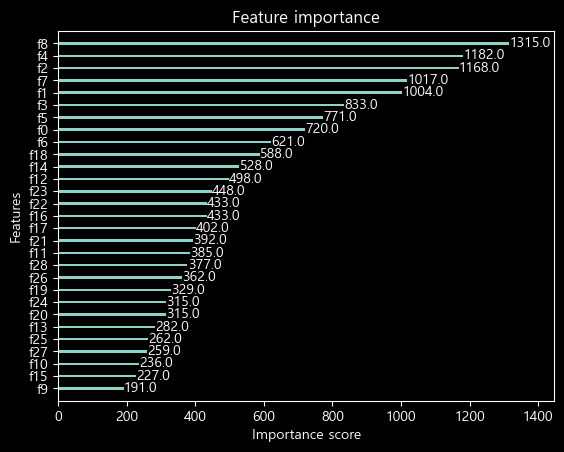

{'f0': '총_상주인구_수_밀도_평균', 'f1': '총_가구_수_밀도_평균', 'f2': '월_평균_소득_금액_밀도_평균', 'f3': '지출_총금액_밀도_평균', 'f4': '아파트_단지_수_밀도_평균', 'f5': '아파트_평균_면적_밀도_평균', 'f6': '아파트_평균_시가_밀도_평균', 'f7': '총_직장_인구_수_밀도_평균', 'f8': '집객시설_수_밀도_평균', 'f9': '지하철_수_800m', 'f10': '지하철_수_1200m', 'f11': '버스_수_400m', 'f12': '버스_수_800m', 'f13': '공원_수_300m', 'f14': '공원_수_600m', 'f15': '화장실_수_400m', 'f16': '화장실_수_800m', 'f17': '즉석판매제조가공업_수_300m', 'f18': '즉석판매제조가공업_수_600m', 'f19': '건강기능식품일반판매업_수_300m', 'f20': '건강기능식품일반판매업_수_600m', 'f21': '미용업_수_300m', 'f22': '미용업_수_600m', 'f23': '일반음식점_수_300m', 'f24': '일반음식점_수_600m', 'f25': '커피숍_수_300m', 'f26': '커피숍_수_600m', 'f27': '편의점_수_300m', 'f28': '편의점_수_600m'}


In [31]:
from xgboost import plot_importance
plot_importance(final_xgb, grid=False)
plt.show()
feature_dict = {
  f"f{idx}":c
  for idx, c in enumerate(x_train.columns)
}
print(feature_dict)

In [32]:
import joblib

os.makedirs(os.path.join(config.PROJECT_ROOT, 'models'), exist_ok=True)
joblib.dump(final_xgb, os.path.join(config.PROJECT_ROOT, 'models', 'xgb_final_model.pkl'))
joblib.dump(final_lgb, os.path.join(config.PROJECT_ROOT, 'models', 'lgb_final_model.pkl'))
joblib.dump(scaler, os.path.join(config.PROJECT_ROOT, 'models', 'scaler.pkl'))

# scaler = joblib.load(os.path.join(config.PROJECT_ROOT, 'models', 'scaler.pkl'))
# xgb = joblib.load(os.path.join(config.PROJECT_ROOT, 'models', 'xgb_final_model.pkl'))
# lgb = joblib.load(os.path.join(config.PROJECT_ROOT, 'models', 'lgb_final_model.pkl'))

['C:\\Users\\pegoo\\Desktop\\25년도 2학기\\AI Expansion LAB\\models\\scaler.pkl']